In [13]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

#Para lectura de dataset en kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Ignorar warnings para una mejor visualización
import warnings
warnings.filterwarnings('ignore')

In [14]:
# IMPORTAR EL DATASET DESDE KAGGLE
file_path = "diabetes.csv"

# Load the latest version
df_completo = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mathchi/diabetes-data-set",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df_completo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Primeras 5 filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               76

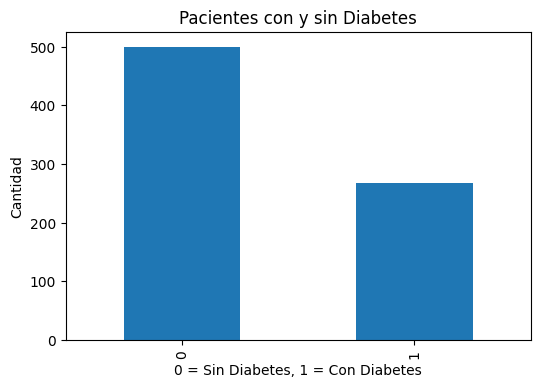

In [15]:
#ANALISIS EXPLORATORIO DE LOS DATOS

# Ver las primeras 5 filas
print("Primeras 5 filas del dataset:")
print(df_completo.head())

# Ver información básica
print("\nInformación del dataset:")
print(df_completo.info())

# Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(df_completo.describe())

# Contar valores nulos
print("\nValores nulos:")
print(df_completo.isnull().sum())

# Ver si hay duplicados
print(f"\nFilas duplicadas: {df_completo.duplicated().sum()}")

# Ver distribución de diabetes (Outcome)
print("\nCuántas personas tienen diabetes:")
print(df_completo['Outcome'].value_counts())

# Graficar la distribución de Outcome
plt.figure(figsize=(6, 4))
df_completo['Outcome'].value_counts().plot(kind='bar')
plt.title('Pacientes con y sin Diabetes')
plt.xlabel('0 = Sin Diabetes, 1 = Con Diabetes')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
##IDENTIFICAR VALORES ATÍPICOS o CEROS QUE NO TIENEN SENTIDO DEBIDO A ESTUDIO DE DIABETES

# Estas columnas no pueden tener valor 0 en la vida real ya son requisito para identificacion de diabetes
columnas_revisar = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Contar cuántos ceros hay
for columna in columnas_revisar:
    ceros = (df_completo[columna] == 0).sum()
    print(f"{columna}: {ceros} valores en cero")

Glucose: 5 valores en cero
BloodPressure: 35 valores en cero
SkinThickness: 227 valores en cero
Insulin: 374 valores en cero
BMI: 11 valores en cero


In [18]:
#PREPROCESAMIENTO PARA MANEJAR LOS CEROS

# Copiar el dataset para no modificar el original
df = df_completo.copy()

# Reemplazar los ceros con la mediana de cada columna
print("\nReemplazando ceros con la mediana:")
for columna in columnas_revisar:
    # Calcular mediana sin los ceros
    mediana = df[df[columna] != 0][columna].median()
    # Reemplazar ceros
    df[columna] = df[columna].replace(0, mediana)
    print(f"{columna}: mediana = {mediana:.2f}")

# Verificar que ya no hay ceros
print("\nVerificación que ya no hay ceros:")
for columna in columnas_revisar:
    ceros = (df[columna] == 0).sum()
    print(f"{columna}: {ceros} ceros")


Reemplazando ceros con la mediana:
Glucose: mediana = 117.00
BloodPressure: mediana = 72.00
SkinThickness: mediana = 29.00
Insulin: mediana = 125.00
BMI: mediana = 32.30

Verificación que ya no hay ceros:
Glucose: 0 ceros
BloodPressure: 0 ceros
SkinThickness: 0 ceros
Insulin: 0 ceros
BMI: 0 ceros


In [22]:
###SEPARAR DATOS EN ENTRENAMIENTO Y PRUEBA

# X = todas las columnas menos Outcome
X = df.drop('Outcome', axis=1)

# y = solo la columna Outcome
y = df['Outcome']

print(f"X tiene {X.shape[0]} filas y {X.shape[1]} columnas")
print(f"y tiene {y.shape[0]} valores")

# Dividir en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nDatos de entrenamiento: {X_train.shape[0]} filas")
print(f"Datos de prueba: {X_test.shape[0]} filas")

X tiene 768 filas y 8 columnas
y tiene 768 valores

Datos de entrenamiento: 614 filas
Datos de prueba: 154 filas


In [23]:
#ESCALAR LOS DATOS

# Crear el escalador
scaler = StandardScaler()

# Escalar los datos de entrenamiento
X_train = scaler.fit_transform(X_train)

# Escalar los datos de prueba
X_test = scaler.transform(X_test)

print("Datos escalados correctamente")

Datos escalados correctamente


In [ ]:
##ENTRENAMIENTO DE MODELO RANDOM FOREST

# Se crea el modelo de identificar diabetes con random forest
modelo_rf = RandomForestClassifier()

# Entrenar el modelo
modelo_rf.fit(X_train, y_train)

print("Modelo entrenado!")


Modelo entrenado!


In [ ]:
# PRUEBA DE PREDICCIÓN RANDOM FOREST
print("\nRandom Forest:")
y_pred2 = modelo_rf.predict(X_test)
print(f"Prueda de primeras 10 predicciones: {y_pred2[:10]}")

print(f"\nValores reales: {y_test.values[:10]}")


Random Forest:
Primeras 10 predicciones: [0 0 0 0 0 1 0 1 1 1]

Valores reales: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
# VALUAR EL MODELO DE RAMDOM FOREST
# Calcular accuracy
accuracy_rf = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy_rf:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm_rf = confusion_matrix(y_test, y_pred2)
print(cm_rf)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.7662

Matriz de Confusión:
[[78 21]
 [15 40]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



In [28]:
##ENTRENAMIENTO DE MODELO K-NEAREST NEIGHBORS (KNN)

modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
modelo_knn.fit(X_train, y_train)

print("Modelo entrenado!")

Modelo entrenado!


In [29]:
# PRUEBA DE PREDICCIÓN K-NEAREST NEIGHBORS (KNN)
print("\nKNN:")
y_pred3 = modelo_knn.predict(X_test)
print(f"Prueda de primeras 10 predicciones: {y_pred3[:10]}")

print(f"\nValores reales: {y_test.values[:10]}")


KNN:
Prueda de primeras 10 predicciones: [1 0 0 1 1 1 0 0 1 0]

Valores reales: [0 0 0 0 0 0 0 0 0 0]


In [30]:
# VALUAR EL MODELO DE RAMDOM FOREST

# Calcular accuracy
accuracy_knn = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy_knn:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm_knn = confusion_matrix(y_test, y_pred3)
print(cm_knn)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.7208

Matriz de Confusión:
[[74 25]
 [18 37]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        99
           1       0.60      0.67      0.63        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.72      0.72       154



Random Forest - Accuracy: 0.7662
KNN - Accuracy: 0.7208

🏆 El mejor modelo es: RANDOM FOREST con 0.7662


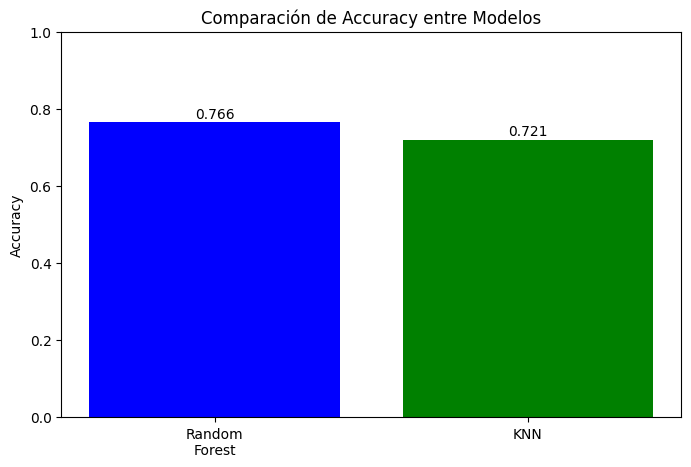

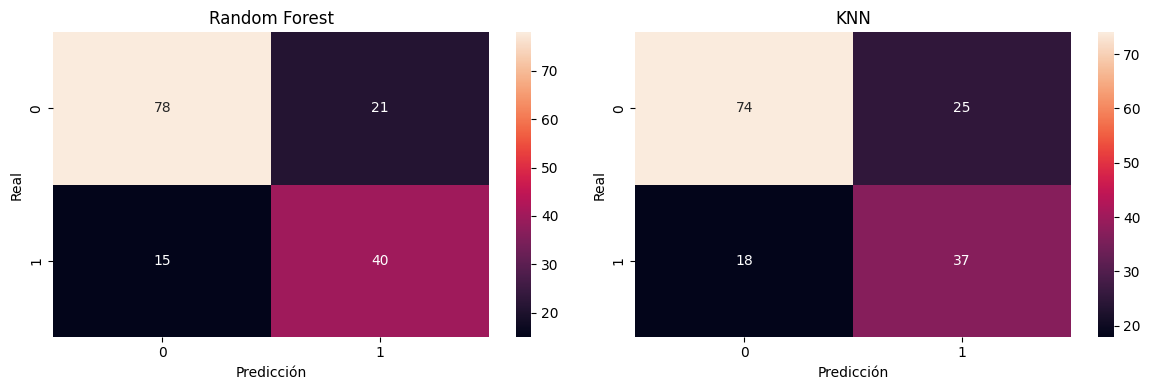


CONCLUSIONES:
Random Forest:
 -Detectó correctamente 78 personas sanas
 -Detectó correctamente 40 personas con diabetes
 -21 falsas alarmas
 -15 casos de diabetes no detectados

KNN:

 -Detectó correctamente 74 personas sanas
 -Detectó correctamente 37 personas con diabetes
 -25 falsas alarmas
 -18 casos de diabetes no detectados

 Por lo tanto el mejor modelo para este caso seria el Random Forest segun la CM



In [35]:
## COMPARACIÓN FINAL



print(f"Random Forest - Accuracy: {accuracy_rf:.4f}")
print(f"KNN - Accuracy: {accuracy_knn:.4f}")

# Ver cuál es el mejor
mejor_accuracy = max(accuracy_rf, accuracy_knn)

if accuracy_rf == mejor_accuracy:
    print(f"\n🏆 El mejor modelo es: RANDOM FOREST con {accuracy_rf:.4f}")
else:
    print(f"\n🏆 El mejor modelo es: KNN con {accuracy_knn:.4f}")

# Graficar comparación
modelos_nombres = ['Random\nForest', 'KNN']
accuracies = [accuracy_rf, accuracy_knn]

plt.figure(figsize=(8, 5))
plt.bar(modelos_nombres, accuracies, color=['blue', 'green', 'red'])
plt.title('Comparación de Accuracy entre Modelos')
plt.ylabel('Accuracy')
plt.ylim([0, 1])

# Agregar valores encima de las barras
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.show()

# Graficar las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


# Matriz rf
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Matriz knn
sns.heatmap(cm_knn, annot=True, fmt='d', ax=axes[1])
axes[1].set_title('KNN')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Conclusión simple
print("""
CONCLUSIONES:
Random Forest:
 -Detectó correctamente 78 personas sanas
 -Detectó correctamente 40 personas con diabetes
 -21 falsas alarmas
 -15 casos de diabetes no detectados
 
KNN:

 -Detectó correctamente 74 personas sanas
 -Detectó correctamente 37 personas con diabetes
 -25 falsas alarmas
 -18 casos de diabetes no detectados
 
 Por lo tanto el mejor modelo para este caso seria el Random Forest segun la CM
""")